In [0]:
import numpy as np
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from urllib import request
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from google.colab import files
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name = fn, length=len(uploaded[fn])))

Saving pima-indians-diabetes.csv to pima-indians-diabetes (1).csv
User uploaded file "pima-indians-diabetes.csv" with length 24045 bytes


In [0]:
!ls

'pima-indians-diabetes (1).csv'   pima-indians-diabetes.csv   sample_data


In [0]:
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter = ",")

In [0]:
#데이터 셋 설정하기

x_train = dataset[:700, 0:8]
y_train = dataset[:700, 8]
x_test = dataset[700:, 0:8]
y_test = dataset[700:, 8]

In [0]:
y_test

array([0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0.])

In [0]:
#모델 구성하기
model = Sequential()
model.add(Dense(12, input_dim=8, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [0]:
#모델 학습과정 설정하기
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [0]:
#모델 학습시키기
hist = model.fit(x_train,y_train,epochs =200, batch_size=32)

Epoch 1/200
700/700 [==============================] - 0s 386us/step - loss: 4.5563 - acc: 0.6571
Epoch 2/200
700/700 [==============================] - 0s 42us/step - loss: 3.3065 - acc: 0.6586
Epoch 3/200
700/700 [==============================] - 0s 46us/step - loss: 1.6315 - acc: 0.6514
Epoch 4/200
700/700 [==============================] - 0s 51us/step - loss: 0.9137 - acc: 0.6371
Epoch 5/200
700/700 [==============================] - 0s 45us/step - loss: 0.7668 - acc: 0.5857
Epoch 6/200
700/700 [==============================] - 0s 48us/step - loss: 0.7256 - acc: 0.5671
Epoch 7/200
700/700 [==============================] - 0s 53us/step - loss: 0.7016 - acc: 0.5929
Epoch 8/200
700/700 [==============================] - 0s 46us/step - loss: 0.6772 - acc: 0.6329
Epoch 9/200
700/700 [==============================] - 0s 42us/step - loss: 0.6646 - acc: 0.6486
Epoch 10/200
700/700 [==============================] - 0s 46us/step - loss: 0.6551 - acc: 0.6429
Epoch 11/200
700/700 [======

In [0]:
#모델평가하기 
scores = model.evaluate(x_test, y_test)
print("%s: %.2f%%" %(model.metrics_names[1],scores[1]*100))

68/68 [==============================] - 0s 1ms/step
acc: 69.12%


In [0]:
scores

[0.7351598073454464, 0.6911764705882353]

In [0]:
model.metrics_names

['loss', 'acc']

[Text(0, 0.5, 'loss'), Text(0.5, 0, 'epoch'), Text(0.5, 1.0, 'model loss')]

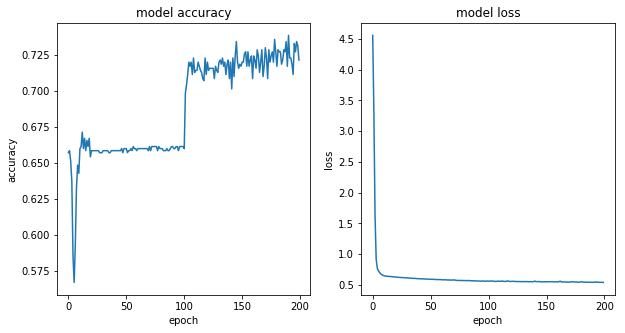

In [0]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize =(10,5))

#모델의 정확도
ax0.plot(hist.history['acc'])
ax0.set(title = 'model accuracy', xlabel='epoch', ylabel='accuracy')


#모델의 오차 
ax1.plot(hist.history['loss'])
ax1.set(title = 'model loss', xlabel='epoch', ylabel='loss')

In [0]:
patient = np.array([[0,137,90,35,168,43.1,2.228,33]])
#모델예측하기

prediction = model.predict(patient)

print(prediction)



[[0.42615455]]
